# Exercise 8.4
Introduction:  In this code, we solve a problem that involves a nonlinear pendulum.  This means that the behavior of the pendulum is approximated using a nonlinear equation that is difficult to solve analytically.  Newton's Second law gives us the equation of motion for a pendulum $\frac{d^2\theta}{dt^2}=-\frac{g}{l}sin\theta$ To solve this, we break it up into two first-order equations$\frac{d\theta}{dt}=\omega$ and $\frac{d\omega}{dt}=-\frac{g}{l}sin\theta$.  We combine the two into a single vector $r = (\theta,\omega)$ and apply the fourth order Runge-Kutta method.

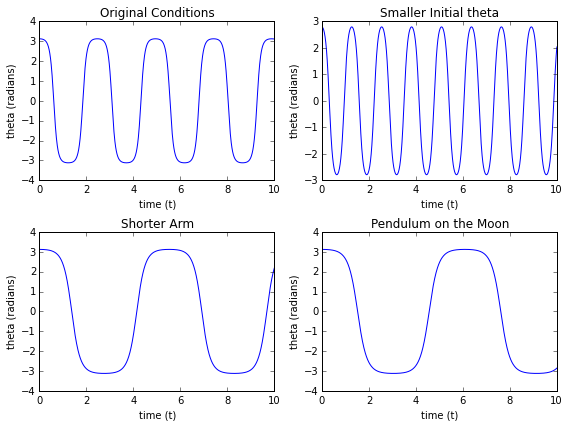

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

g = 9.81
l = 0.1
r0 = 179*math.pi/180
interval = np.array([0,10],float)

def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*math.sin(theta)
    return np.array([ftheta,fomega],float)



points = solve_coupled(f,2,(r0,0),interval,1000,order=4)
r = points[:,1]
t = points[:,0]
plt.figure(figsize=(8, 6))

plt.subplot(2,2,1)
plt.plot(t,r)
plt.title("Original Conditions")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")


g = 9.81
l = 0.1
r0 = 160*math.pi/180

points = solve_coupled(f,2,(r0,0),interval,1000,order=4)
r = points[:,1]
t = points[:,0]
plt.subplot(2,2,2)
plt.plot(t,r)
plt.title("Smaller Initial theta")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")


g = 9.81
l = 0.5
r0 = 179*math.pi/180

points = solve_coupled(f,2,(r0,0),interval,1000,order=4)
r = points[:,1]
t = points[:,0]
plt.subplot(2,2,3)
plt.plot(t,r)
plt.title("Shorter Arm")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")


g = 1.62
l = 0.1
r0 = 179*math.pi/180

points = solve_coupled(f,2,(r0,0),interval,1000,order=4)
r = points[:,1]
t = points[:,0]
plt.subplot(2,2,4)
plt.plot(t,r)
plt.title("Pendulum on the Moon")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")
plt.tight_layout()
plt.show()

The first graph above shows the behavior of a pendulum with an arm lenth of 10 cm, a mass of m, acceleration due to gravity of 9.81 $\frac{m}{s^2}$, and starting angle of 179$^{\circ}$.  The pendulum starts at its maximum height, and falls rapidly to its minimum point. It is moving slowly at the maximum and minimum. The pendulum swinging with a smaller initial theta has a higher frequency because it takes less time to get between the two maximum displacement angles.  The period of the arm gets larger because the length of the pendulum $l$ is in the denominator of the equation above, and so if $l$ is smaller, then $omega$ gets larger.  A pendulum on the moon has a smaller acceleration due to gravity, and so the time period $T$ increases.  $T$ is inversely proportional to gravity by the equation $T=2\pi \sqrt{l/g}$ where $g$ is the acceleration due to gravity.

# Exercise 8.5
## The Driven Harmonic Oscillator

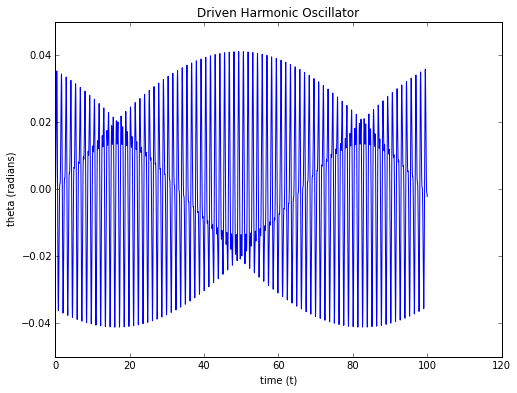

In [7]:
# constants
C = 2 # inverse seconds squared
capital_omega = 5 #inverse seconds
g = 9.81 # meters per second squared
l = 0.1 # meters
r0 = 0*math.pi/180  # radians
interval = np.array([0,100],float) # seconds

def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*math.sin(theta)+C*math.cos(theta)*math.sin(capital_omega*t)
    return np.array([ftheta,fomega],float)

points = solve_coupled(f,2,(r0,0),interval,10000,order=4)
r = points[:,1]
t = points[:,0]
plt.figure(figsize=(8, 6))
plt.plot(t,r)
plt.title("Driven Harmonic Oscillator")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")


The above graphe shows a driven harmonic oscillator.  We can tell that it is an undampened oscillator because the amplitudes are not decreasing over time.  The oscillator is driven with an outside force applied to it.  The function we see in the graph above is a combination of sines and cosines.  Taking a look at time t = 20, we see that two lines of sinusoidal functions intersect at 0.02 radians.  We can compare this to pushing a child on a swing very nearly after they have reached a peak, and are coming back down.  If we look at about time t = 50, we again that two lines of sinusoidal functions intersecct at approximately -0.02 radians.  This could be compared to a child on his way upwards, then being pushed.  If the child is pushed at exactly the right time, we would see a simple sine wave with the largest amplitude possible while keeping all other variables the same.  This is called resonance. 

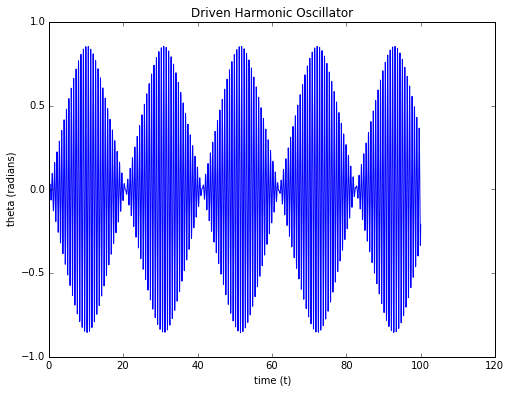

In [9]:
C = 2 # inverse seconds squared
capital_omega = math.sqrt(g/l) #inverse seconds
g = 9.81 # meters per second squared
l = 0.1 # meters
r0 = 0*math.pi/180  # radians
interval = np.array([0,100],float) # seconds

points = solve_coupled(f,2,(r0,0),interval,10000,order=4)
r = points[:,1]
t = points[:,0]
plt.figure(figsize=(8, 6))
plt.plot(t,r)
plt.title("Driven Harmonic Oscillator")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")


In theory, if we change capital omega to be the square root of g over l, we would see the pendulum resonate.  If this were a resonant, then the above graph would have a large maximum amplitude.